In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import os
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [2]:
# create a database connection
sqluser = 'maxim'
dbname = 'maxim'
schema_name = 'mimiciii'

In [51]:
# Connect to local postgres version of mimic
connect = psycopg2.connect(dbname=dbname, user=sqluser)
cursor = connect.cursor()
cursor.execute('SET search_path to {}'.format(schema_name))

In [52]:
# Load in the query from file
query='SELECT * FROM uofirstday'
df = pd.read_sql_query(query, connect)

In [53]:
df.head()

,subject_id,hadm_id,icustay_id,urineoutput
0,3,145834,211552,497.0
1,4,185777,294638,2150.0
2,6,107064,228232,1940.0
3,8,159514,262299,150.0
4,9,150750,220597,887.0


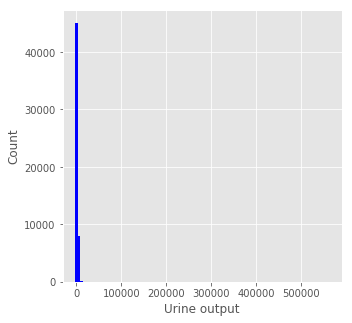

In [58]:
f, axs = plt.subplots(1,1,figsize=(5,5))
df.urineoutput.hist(bins=100,color='blue')
plt.xlabel('Urine output')
plt.ylabel('Count')
plt.savefig('urine_hist.pdf')

In [7]:
# Load in the query from file
queries_dir='/Users/maxim/Documents/ml_nanodegree/capstone/mortality_predictor_mimic/queries'
query='DROP TABLE IF EXISTS mimiciii.urineoutput;'
cursor.execute(query)
f = os.path.join(queries_dir,'urine-output.sql')
with open(f) as fp:
    query = ''.join(fp.readlines())
# Execute the query
print('Generating table \'urineoutput\' using {} ...'.format(f),end=' ')
cursor.execute(query)
print('done.')
connect.commit()

Generating table 'urineoutput' using /Users/maxim/Documents/ml_nanodegree/capstone/mortality_predictor_mimic/queries/urine-output.sql ... done.


In [8]:
# Load in the query from file
query='SELECT * FROM urineoutput'
uo = pd.read_sql_query(query, connect)

In [9]:
uo.head()

,subject_id,hadm_id,value,itemid,charttime,hospital_expire_flag
0,21219,177991,210.0,40055,2142-09-14 01:00:00,1
1,21219,177991,200.0,40055,2142-09-08 10:00:00,1
2,21219,177991,200.0,40055,2142-09-08 12:00:00,1
3,21219,177991,120.0,40055,2142-09-08 13:00:00,1
4,21219,177991,100.0,40055,2142-09-08 14:00:00,1


In [27]:
uo.subject_id.value_counts().head(10)

12613    5160
6365     3161
18350    2197
3133     2197
62646    2172
27172    2120
14249    2044
18992    2009
25256    2006
781      2005
Name: subject_id, dtype: int64

In [17]:
uo.itemid.value_counts().head()

40055     1914039
226559    1186717
43175      108979
40069       68991
226560      63020
Name: itemid, dtype: int64

In [37]:
def get_sum(y):
    s = []
    ss = 0.
    for yi in y:
        ss+=yi
        s.append(ss)
    return s
    

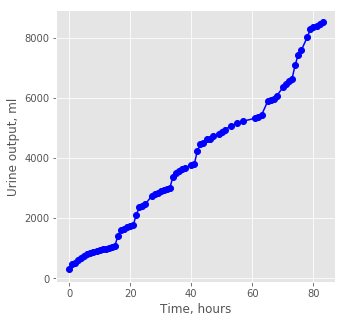

In [59]:
f, axs = plt.subplots(1,1,figsize=(5,5))

per_sub = uo.loc[(uo.subject_id == 6365) & (uo.itemid == 40055)].sort_values(by='charttime')
x = (per_sub.charttime - per_sub.iloc[0]['charttime']).dt.total_seconds().values/3600
y = per_sub.value.values
y2 = get_sum(y)
plt.plot(x[:24*3],y2[:24*3],'-o',color='blue')
plt.ylabel('Urine output, ml')
plt.xlabel('Time, hours')
plt.savefig('urine_rate.pdf')